In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import h5py
import sys
import os
import glob
import warnings
from pprint import pprint
import matplotlib.pyplot as plt

from tqdm import tqdm

import torch

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

basedir = '/project/vitelli/jonathan/REDO_fruitfly/'
sys.path.insert(0, os.path.join(basedir, 'release'))

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 6

warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [134]:
from train_myosin_translation import MaskedVAE
from utils.vae.convnext_models import VAE

vae = MaskedVAE(in_channels=4, 
                  out_channels=2, 
                  num_latent=64, 
                  stage_dims=[[32,32], [64,64], [128,128], [256,256]])
info = torch.load('../../tb_logs/May2024/MaskedVAE_sqh_beta=1e-05_split=embryo')
vae.load_state_dict(info['state_dict'])
vae = vae.double().to(device).eval();

print(info['val_df'].embryoID.unique())

def v_model(t, y):
    y = y.reshape([-1, 5, 236, 200])[:, :4]
    return VAE.forward(vae, y)[0]

[202006261115 202007011145 202007081130 202009041145 202007231115
 202007301030 202008121100 201712182130 201712182330 201712192000
 201712200000 201712191740]


(31, 2, 2, 236, 200) (31, 2, 236, 200) (31,)
Initializing
Using torchdiffeq solver


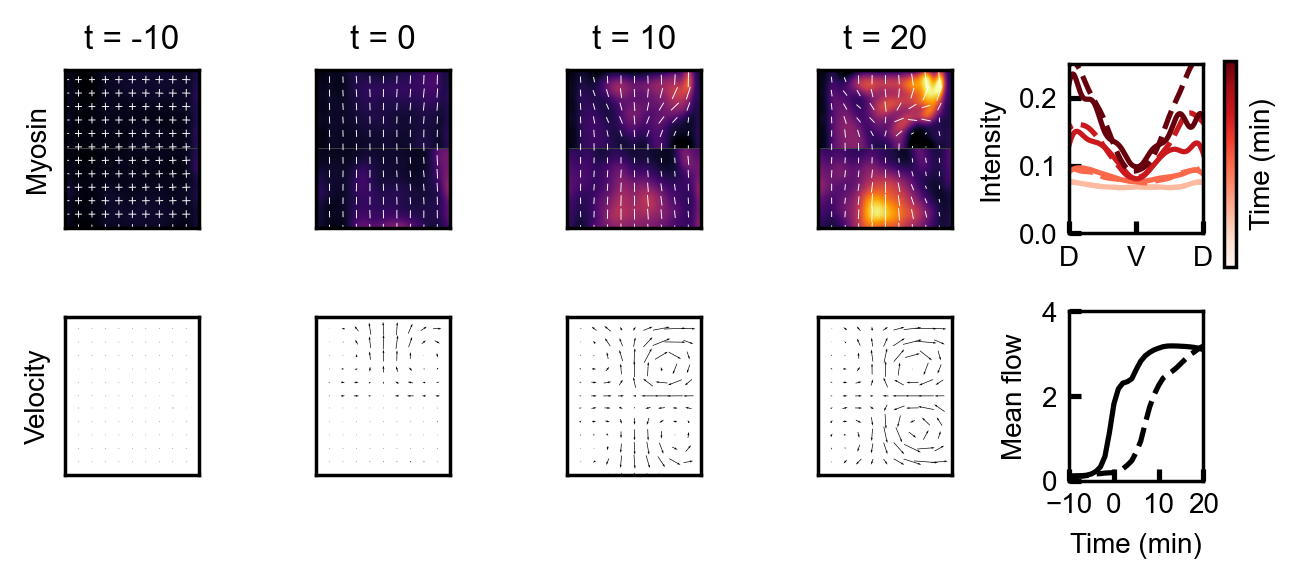

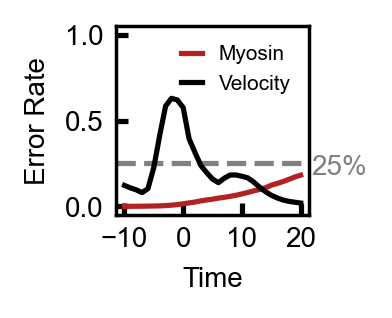

In [135]:
import torch
from utils.forecasting.closed_loop import ClosedFlyLoop
from plotting import sqh_vel_plot

from mutant_datasets import *


#Collect initial conditions - m, c, v, and time
m0 = np.load('../Figures/Forecasting/m0.npy')
v0 = np.load('../Figures/Forecasting/v0.npy')
s0 = np.load('../Figures/Forecasting/c0.npy')
t0 = np.load('../Figures/Forecasting/time.npy')

print(m0.shape, v0.shape, t0.shape)

y0 = np.concatenate([
    m0[0].reshape([4, 236, 200]),
    s0[0].reshape([1, 236, 200]),
])
y0 = torch.from_numpy(y0)

model = ClosedFlyLoop(v_model, sigma=5)
model.fit(y0[None])

m, s, v = model.integrate(y0.to(device), t0)
fig1, fig2 = sqh_vel_plot(
    t0,
    m, m0,
    v, v0,
    dt=10)

100%|██████████| 6/6 [00:00<00:00, 268.76it/s]


(31, 2, 2, 236, 200) (31, 2, 236, 200) (31,)
Initializing
Using torchdiffeq solver


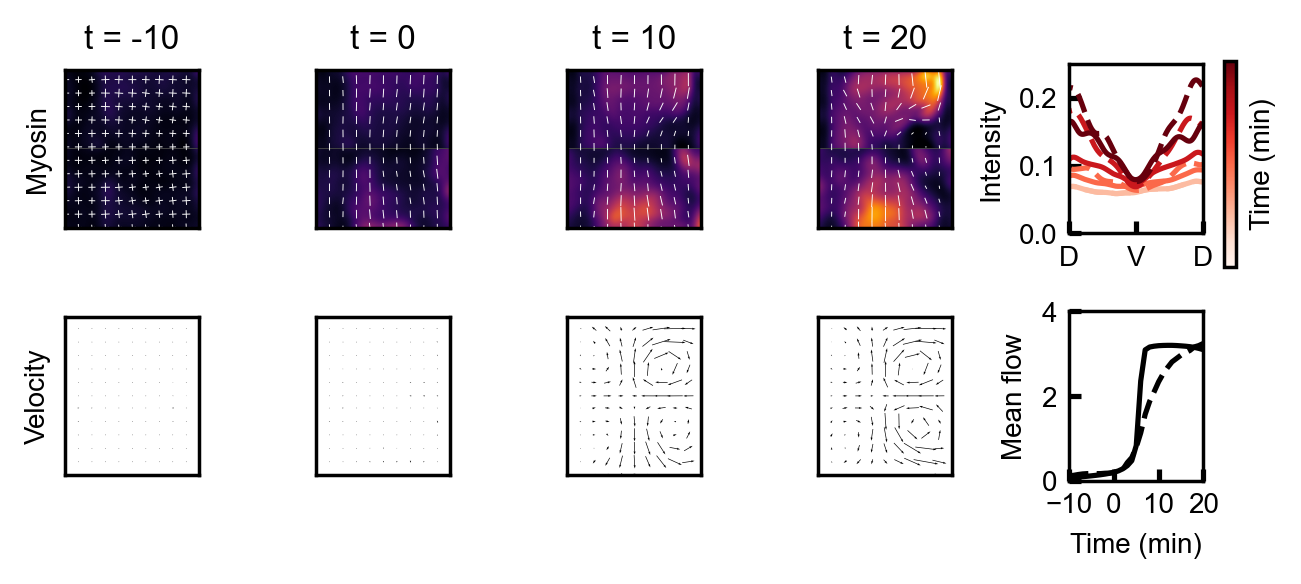

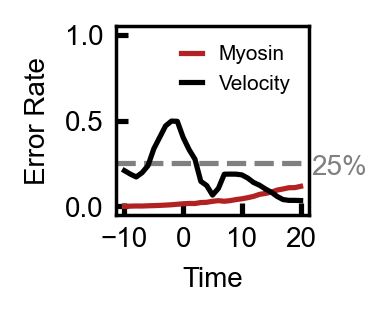

In [136]:
import torch
from utils.forecasting.closed_loop import ClosedFlyLoop
from plotting import sqh_vel_plot

from mutant_datasets import *

dataset = WTDataset(tmin=-10, tmax=20)
m0, v0, t0 = dataset.get_trajectory(202007091200)
print(m0.shape, v0.shape, t0.shape)

y0 = np.concatenate([
    m0[0].reshape([4, 236, 200]),
    s0[0].reshape([1, 236, 200]),
])
y0 = torch.from_numpy(y0)

model = ClosedFlyLoop(v_model, sigma=5)
model.fit(y0[None])

m, s, v = model.integrate(y0.to(device), t0)
fig1, fig2 = sqh_vel_plot(
    t0,
    m, m0,
    v, v0,
    dt=10)

100%|██████████| 6/6 [00:00<00:00, 25.24it/s]


(31, 2, 2, 236, 200) (31, 2, 236, 200) (31,)
Initializing
Using torchdiffeq solver


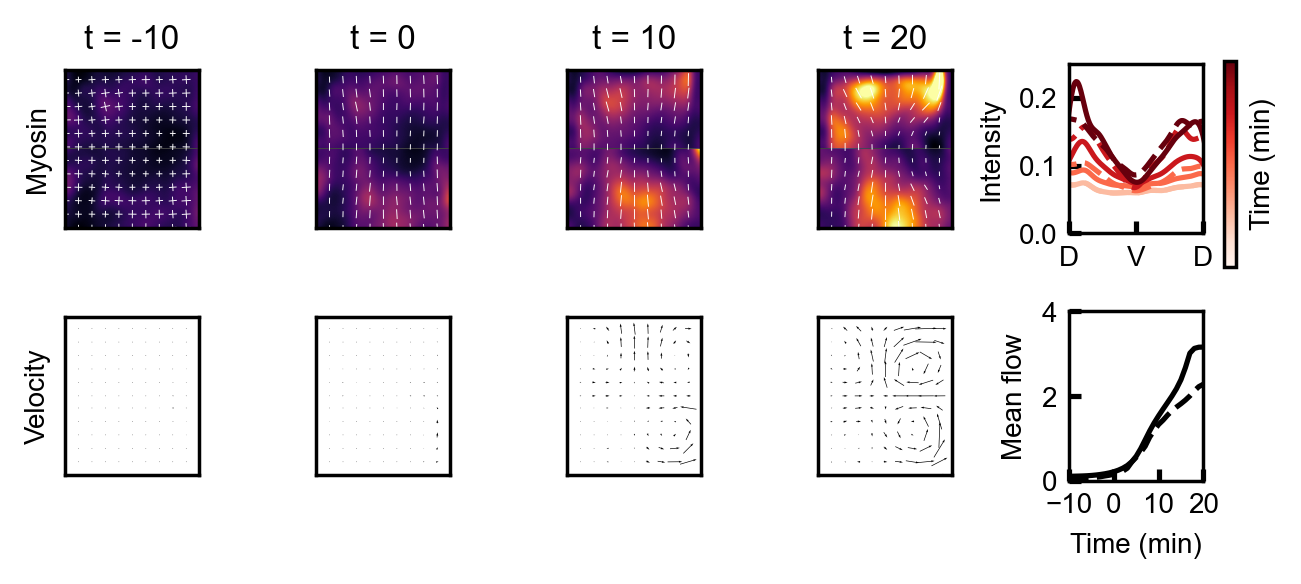

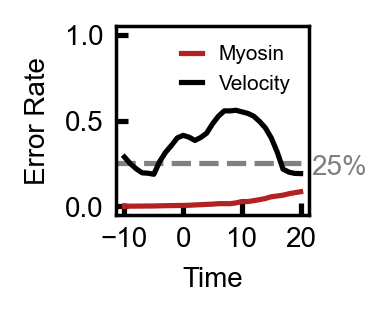

In [138]:
dataset = TwistDataset(tmin=-10, tmax=20)
m0, v0, t0 = dataset.get_trajectory(202007301030)
print(m0.shape, v0.shape, t0.shape)

y0 = np.concatenate([
    m0[0].reshape([4, 236, 200]),
    s0[0].reshape([1, 236, 200]),
])
y0 = torch.from_numpy(y0)

model = ClosedFlyLoop(v_model, sigma=5)
model.fit(y0[None])

m, s, v = model.integrate(y0.to(device), t0)
fig1, fig2 = sqh_vel_plot(
    t0,
    m, m0,
    v, v0,
    dt=10)

100%|██████████| 8/8 [00:00<00:00, 258.11it/s]


(31, 2, 2, 236, 200) (31, 2, 236, 200) (31,)
Initializing
Using torchdiffeq solver


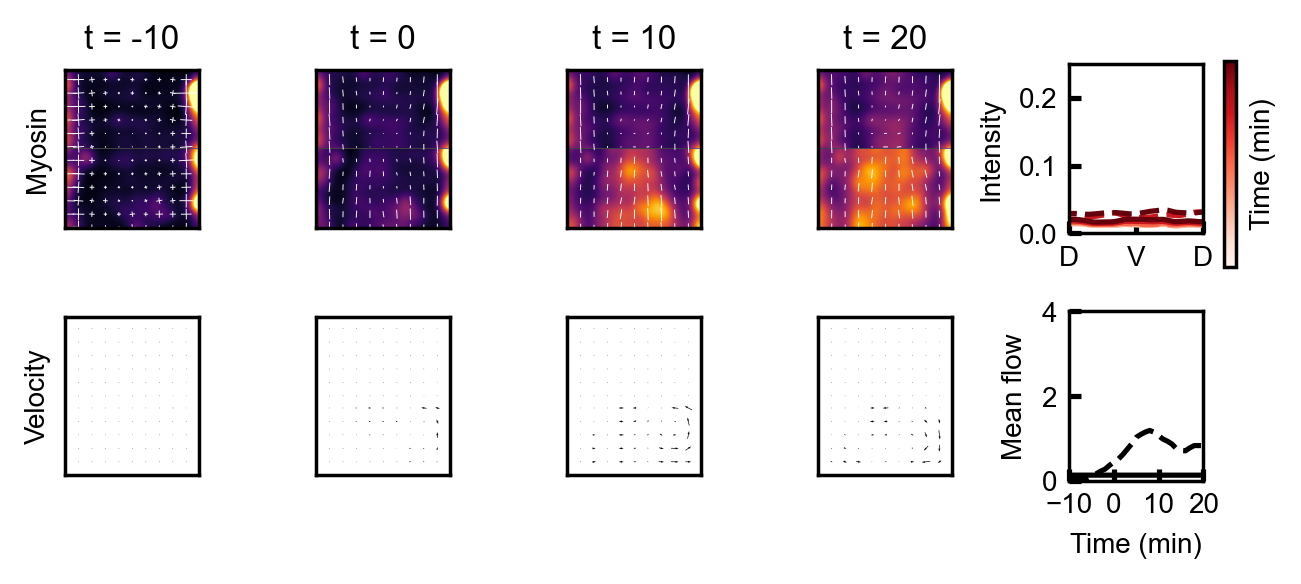

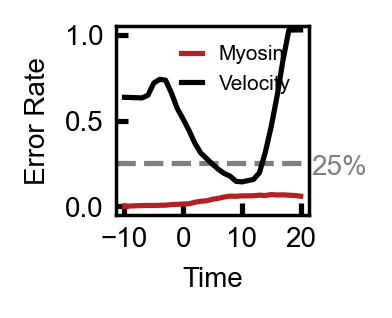

In [139]:
dataset = TollDataset(tmin=0, tmax=30)
m0, v0, t0 = dataset.get_trajectory(201712192100)
t0 -= 10
print(m0.shape, v0.shape, t0.shape)

y0 = np.concatenate([
    m0[0].reshape([4, 236, 200]),
    s0[0].reshape([1, 236, 200]),
])
y0 = torch.from_numpy(y0)

model = ClosedFlyLoop(v_model, sigma=5)
model.fit(y0[None])

m, s, v = model.integrate(y0.to(device), t0)
fig1, fig2 = sqh_vel_plot(
    t0,
    m, m0,
    v, v0,
    dt=10)

100%|██████████| 4/4 [00:00<00:00, 251.27it/s]


(31, 2, 2, 236, 200) (31, 2, 236, 200) (31,)
Initializing
Using torchdiffeq solver


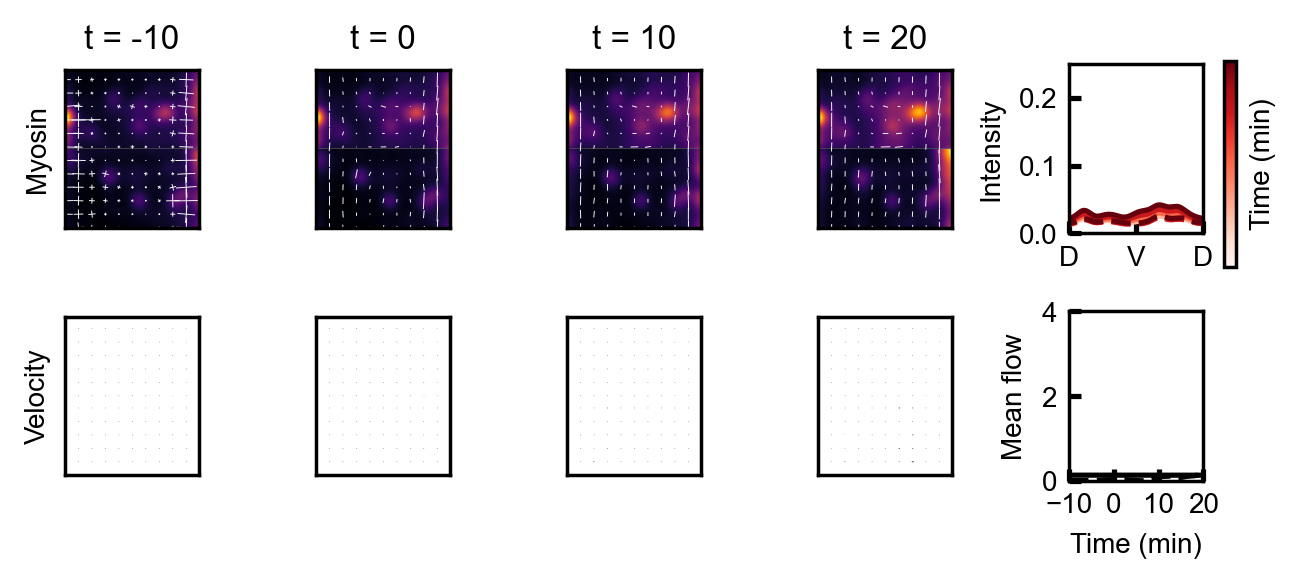

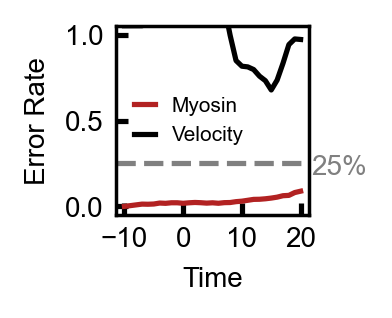

In [140]:
dataset = SpaetzleDataset(tmin=0, tmax=30)
m0, v0, t0 = dataset.get_trajectory(201712191340)
t0 -= 10
print(m0.shape, v0.shape, t0.shape)

y0 = np.concatenate([
    m0[0].reshape([4, 236, 200]),
    s0[0].reshape([1, 236, 200]),
])
y0 = torch.from_numpy(y0)

model = ClosedFlyLoop(v_model, sigma=5)
model.fit(y0[None])

m, s, v = model.integrate(y0.to(device), t0)
fig1, fig2 = sqh_vel_plot(
    t0,
    m, m0,
    v, v0,
    dt=10)